In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [69]:
atomic_distance = 2.54e-10 # = 2.54 Angstrom
sample_thickness = atomic_distance*78740 # \approx 20 micrometers
sample_width = atomic_distance*19.685
N = 20
L = sample_thickness/N
atoms_per_box = int((L/atomic_distance) * (sample_width/atomic_distance))
seconds_in_a_day = 3600*24
1e6/seconds_in_a_day

11.574074074074074

In [72]:
dump_contents = os.listdir('../coarse_dump_02')
len(dump_contents)

42

In [91]:
data = []
time_days_list = []
temperature_list = []
for i in [0,20,39]:
    with open(f'../coarse_dump_02/{dump_contents[i]}', 'r')as f:
        lines = f.read().splitlines()
    list = [int(line)/atoms_per_box for line in lines]
    data.append(list)
    filename_split = dump_contents[i].split('_')
    time_seconds = float(filename_split[2])
    time_days = time_seconds/seconds_in_a_day
    temperature = filename_split[-1].split('.')[0]
    time_days_list.append(float(time_days))
    temperature_list.append(float(temperature))




In [54]:
x_n = range(0,N)
x = [x_n_i * L + L/2 for x_n_i in x_n]
print(data[0])

[0.2655569534501113, 0.24555630826800864, 0.22562018129617084, 0.2497177328300913, 0.2729765476305687, 0.2351043582051034, 0.21623278170263557, 0.2790735185005968, 0.2582341365850511, 0.19897416045678892, 0.00987128617052163, 0.016677957353463016, 0.00800025807284106, 0.00032259105132423626, 0.0034194651440369044, 0.0039033517210232587, 0.006032452659763218, 0.0009355140488402851, 9.677731539727088e-05, 0.003451724249169328]


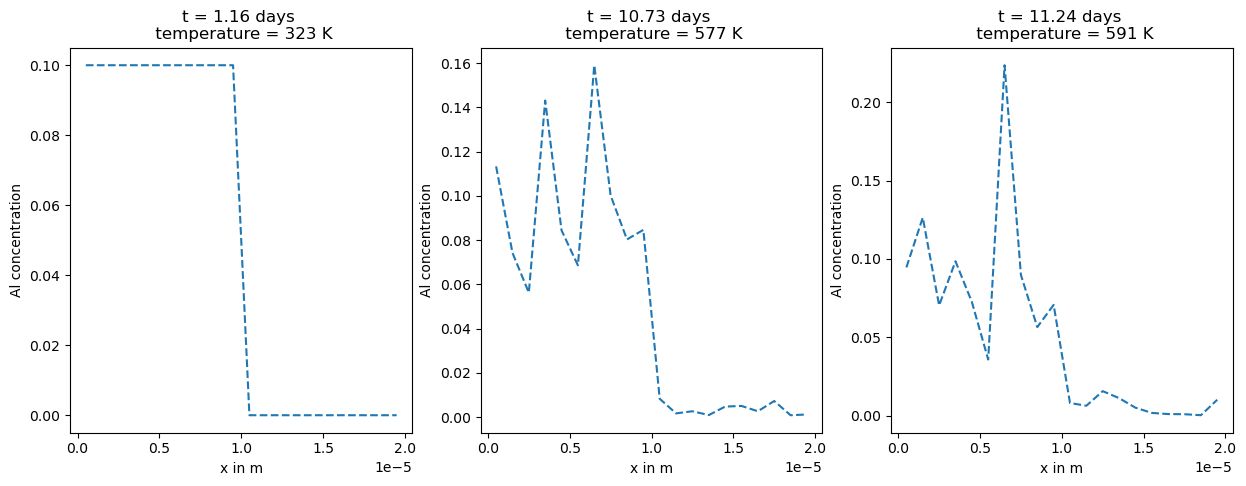

In [95]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
for i in [0,1,2]:
    ax[i].set_title(f't = {time_days_list[i]:.2f} days \n temperature = {temperature_list[i]:.0f} K')
    ax[i].plot(x, data[i], '--')
    ax[i].set_xlabel('x in m')
    ax[i].set_ylabel('Al concentration')
plt.savefig('../report/graphics/alcu_x_concentration_coarse_grained.png')